# MNIST Multi-Layered-Perceptron


In [5]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
data = pd.read_csv('minst.csv',header=None)
print(data.shape)
data.head()

(60000, 401)


,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [22]:
a = int(len(data) - (len(data)*0.3))
data.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            391, 392, 393, 394, 395, 396, 397, 398, 399, 400],
           dtype='int64', length=401)

In [8]:
data = data.sample(frac=1).reset_index(drop=True)

In [19]:
y_ = data[400]

In [21]:
y = np.zeros((data.shape[0], int(len(np.unique(y_.values)))))
for i in range(data.shape[0]):
    label = y_[i]
    y[i, label] = 1

In [63]:
X_train = data[:a].drop(columns = 400).values.T
y_train = y[:a, :].T
print(X_train.shape)
print(y_train.shape)

(400, 42000)
(10, 42000)


In [64]:
X_test = data[a:].drop(columns = 400).reset_index(drop=True).values.T
y_test = y[a:, :].T
print(X_test.shape)
print(y_test.shape)

(400, 18000)
(10, 18000)


In [39]:
def act(z):
    return sigmoid(z)

In [40]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [41]:
def relu(x):
    return x*(x>0)

In [42]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 16
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

In [43]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [53]:
def forward_propagation(X, parameters):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1,X) + b1
    A1 = act(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (10, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [54]:
def compute_cost(A2, Y, parameters):
    
    m = Y.shape[0] # number of example

    cost = np.sum(np.sum(np.square(A2-Y)/m))
    
    cost = np.squeeze(cost)
    assert(isinstance(cost, float))
    
    return cost

In [55]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = np.matmul(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)/m
    dZ1 = np.matmul(W2.T, dZ2)*(1 - np.power(A1, 2))
    dW1 = np.matmul(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis = 1, keepdims = True)/m
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [56]:
def update_parameters(parameters, grads, learning_rate):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [60]:
def nn_model(X, Y, num_iterations = 10000, print_cost=False, learning_rate = 1.2):
    print(Y.shape)
    np.random.seed(3)
    costs = []
    (n_x, n_h, n_y) = layer_sizes(X, Y)
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    W1 = parameters["W1"]; #print("W1:" + str(W1))
    b1 = parameters["b1"]; #print("b1:" + str(b1))
    W2 = parameters["W2"]; #print("W2:" + str(W2))
    b2 = parameters["b2"]; #print("b2:" + str(b2))
    
    for i in range(0, num_iterations):
         
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)
        costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        
    return costs, parameters

In [58]:
def predict(parameters, X):
    
    A2, cache = forward_propagation(X, parameters)
    
    return A2

In [ ]:
_, parameters = nn_model(X_train, y_train, num_iterations = 10000, print_cost=True, learning_rate = 1.2)

(10, 42000)
Cost after iteration 0: 10539.556610
Cost after iteration 100: 2300.065986
Cost after iteration 200: 2156.490187
Cost after iteration 300: 1993.131008
Cost after iteration 400: 1878.752343
Cost after iteration 500: 1790.826199
Cost after iteration 600: 1710.849161


<ipython-input-40-b81063e77ec6>:2: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))


Cost after iteration 700: 1654.685226
Cost after iteration 800: 1614.578541
Cost after iteration 900: 1585.855587
Cost after iteration 1000: 1566.093938
Cost after iteration 1100: 1553.564264
Cost after iteration 1200: 1545.213781
Cost after iteration 1300: 1540.707032


In [ ]:
yhat = predict(parameters, X_test)

In [ ]:
accuracy = np.sum((yhat == y_test)*1)/len(y_test)
print("Accuracy: ", str(accuracy*100))

In [ ]:
plt.plot(np.squeeze(_))
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(1.2)+" - Accuracy ="+ str(int(accuracy*100))+"%")
plt.show()

In [127]:
def act(z):
    return np.tanh(z)

Cost after iteration 0: 19.808373
Cost after iteration 100: 0.000652
Cost after iteration 200: 0.000359
Cost after iteration 300: 0.000354
Cost after iteration 400: 0.000392
Cost after iteration 500: 0.000297
Cost after iteration 600: 0.000175
Cost after iteration 700: 0.000121
Cost after iteration 800: 0.000101
Cost after iteration 900: 0.000088
Cost after iteration 1000: 0.000073
Cost after iteration 1100: 0.000058
Cost after iteration 1200: 0.000045
Cost after iteration 1300: 0.000034
Cost after iteration 1400: 0.000025
Cost after iteration 1500: 0.000019
Cost after iteration 1600: 0.000014
Cost after iteration 1700: 0.000010
Cost after iteration 1800: 0.000007
Cost after iteration 1900: 0.000005
Cost after iteration 2000: 0.000004
Cost after iteration 2100: 0.000002
Cost after iteration 2200: 0.000002
Cost after iteration 2300: 0.000001


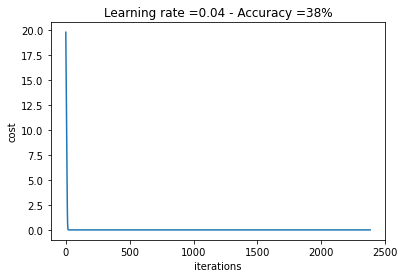

Cost after iteration 0: 19.808373
Cost after iteration 100: 0.000259


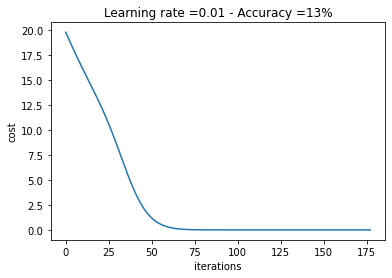

Cost after iteration 0: 19.808373
Cost after iteration 100: 0.000743


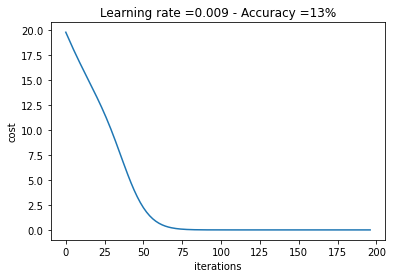

Cost after iteration 0: 19.808373
Cost after iteration 100: 0.253159
Cost after iteration 200: 0.000812


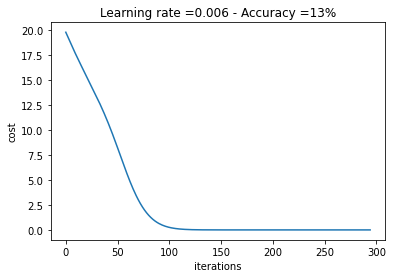

Cost after iteration 0: 19.808373
Cost after iteration 100: 8.129022
Cost after iteration 200: 0.243734


KeyboardInterrupt: 

In [141]:
#plt.figure(figsize=(16, 32))
LR = [0.04, 0.01, 0.009,0.006, 0.003, 0.001]
for i in range(len(LR)):
    costs, parameters = nn_model(X_train, y_train, num_iterations = 3000, print_cost=True, learning_rate = LR[i])
    yhat2 = predict(parameters, X_test)
    accuracy = np.sum((yhat2 == y_test)*1)/len(y_test)
    #plt.subplot(int((len(LR)+1)/2), 2, i+1)
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.title("Learning rate =" + str(LR[i])+" - Accuracy ="+ str(int(accuracy*100))+"%")
    plt.show()


In [ ]:
import winsound         # for sound  
import time             # for sleep

for i in range(150)
    
    winsound.Beep(440, 250) # frequency, duration
    time.sleep(0.25)        # in seconds (0.25 is 250ms)

    winsound.Beep(600, 250)
    time.sleep(0.25)

# The End